# Data Connection or Loading Dataset

In [ ]:

# pydrive pyhton library for google drive and python integration

from pydrive2.auth import GoogleAuth # import Auhentication
from pydrive2.drive import GoogleDrive # Access drive
from google.colab import auth # Pass authentication
from oauth2client.client import GoogleCredentials # credintials

auth.authenticate_user()   # Creating User instance
gauth = GoogleAuth() # Creating instance for authentication
gauth.credentials = GoogleCredentials.get_application_default() # login and authntication
drive = GoogleDrive(gauth) # Acess to google drive


fileDownloaded = drive.CreateFile({'id':'16xeY7Q8fRq86qoeEWDWEGLOUB0tJexAo'}) # Acessing the specific file in google drive
fileDownloaded.GetContentFile('Dataco supply chain dataset.zip') # Importing the file




In [ ]:
# importing baisc library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# to view files in a zipfile
import zipfile

with zipfile.ZipFile("/content/Dataco supply chain dataset.zip", mode="r") as zip_ref:
    zip_ref.printdir()

# Open the zip file
with zipfile.ZipFile('/content/Dataco supply chain dataset.zip', 'r') as zip_ref:
    # Open the csv file inside the zip file
    with zip_ref.open('DataCoSupplyChainDataset.csv') as csv_file:
        # Read the csv file into a pandas dataframe
        df = pd.read_csv(csv_file,encoding='latin-1')

File Name                                             Modified             Size
tokenized_access_logs.csv                      2020-02-13 14:19:54     95446364
DataCoSupplyChainDataset.csv                   2020-02-13 14:19:58     95910149
DescriptionDataCoSupplyChain.csv               2020-02-13 14:20:04         3444


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# Print the dataframe
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
del df['Delivery Status']

# Data Validation


In [ ]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 52 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Late_delivery_risk             180519 non-null  int64  
 6   Category Id                    180519 non-null  int64  
 7   Category Name                  180519 non-null  object 
 8   Customer City                  180519 non-null  object 
 9   Customer Country               180519 non-null  object 
 10  Customer Email                 180519 non-null  object 
 11  Customer Fname                 180519 non-null  object 
 12  Customer Id                   

In [ ]:
# No of rows and column
rows,columns=df.shape
print('No of Rows: ',rows)
print('No of Rows: ',columns)

No of Rows:  180519
No of Rows:  52


In [ ]:
# Category cols
cat_cols=df.select_dtypes(include='object').columns

print('total Category columns : ',len(cat_cols),'\n',cat_cols)

total Category columns :  23 
 Index(['Type', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Email', 'Customer Fname', 'Customer Lname',
       'Customer Password', 'Customer Segment', 'Customer State',
       'Customer Street', 'Department Name', 'Market', 'Order City',
       'Order Country', 'order date (DateOrders)', 'Order Region',
       'Order State', 'Order Status', 'Product Image', 'Product Name',
       'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')


In [ ]:
# Numerical cols
num_cols=df.select_dtypes(exclude='object').columns
print('total Numerical columns : ',len(num_cols),'\n',num_cols)

total Numerical columns :  29 
 Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id',
       'Latitude', 'Longitude', 'Order Customer Id', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Zipcode',
       'Product Card Id', 'Product Category Id', 'Product Description',
       'Product Price', 'Product Status'],
      dtype='object')


# Data Preprocesing

In [ ]:
# Checking for null values and abnormality in data

df.isnull().sum()[df.isnull().sum()>0]

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64

In [ ]:
df[num_cols]

df.loc[:4,['Days for shipping (real)','Days for shipment (scheduled)','Late_delivery_risk','Category Id','Department Id','Order Item Cardprod Id',
 'Order Item Id','Product Category Id','Product Card Id']]

,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Category Id,Department Id,Order Item Cardprod Id,Order Item Id,Product Category Id,Product Card Id
0,3,4,0,73,2,1360,180517,73,1360
1,5,4,1,73,2,1360,179254,73,1360
2,4,4,0,73,2,1360,179253,73,1360
3,3,4,0,73,2,1360,179252,73,1360
4,2,4,0,73,2,1360,179251,73,1360


In [ ]:
for i in ['Days for shipping (real)','Days for shipment (scheduled)','Late_delivery_risk','Category Id','Department Id','Order Item Cardprod Id',
 'Order Item Id','Product Category Id','Product Card Id']:
 print('column levels: ',df[i].nunique())
 display(df[i].value_counts(normalize=True))
 print('_'*100)

column levels:  7


Days for shipping (real)
2    0.313640
3    0.159346
6    0.159113
4    0.157950
5    0.156011
0    0.028141
1    0.025798
Name: proportion, dtype: float64

____________________________________________________________________________________________________
column levels:  4


Days for shipment (scheduled)
4    0.596901
2    0.195082
1    0.154078
0    0.053939
Name: proportion, dtype: float64

____________________________________________________________________________________________________
column levels:  2


Late_delivery_risk
1    0.548291
0    0.451709
Name: proportion, dtype: float64

____________________________________________________________________________________________________
column levels:  51


Category Id
17    0.136002
18    0.123234
24    0.116525
46    0.106903
45    0.095973
48    0.086085
43    0.076053
9     0.069173
29    0.060847
37    0.011240
40    0.009860
36    0.008171
26    0.006653
13    0.006243
35    0.005927
41    0.005396
75    0.004642
63    0.003612
76    0.003601
3     0.003501
7     0.003401
62    0.003279
74    0.002930
33    0.002903
72    0.002725
66    0.002681
68    0.002681
67    0.002676
64    0.002448
32    0.002443
44    0.002437
71    0.002404
65    0.002388
12    0.002343
59    0.002244
38    0.002127
69    0.002005
73    0.001978
5     0.001900
6     0.001817
11    0.001712
30    0.001568
61    0.001501
70    0.001152
60    0.001147
31    0.001003
2     0.000764
10    0.000615
16    0.000377
4     0.000371
34    0.000338
Name: proportion, dtype: float64

____________________________________________________________________________________________________
column levels:  11


Department Id
7     0.370382
4     0.271428
5     0.184025
3     0.080462
6     0.053656
2     0.013733
9     0.011223
10    0.008115
11    0.002725
8     0.002244
12    0.002005
Name: proportion, dtype: float64

____________________________________________________________________________________________________
column levels:  118


Order Item Cardprod Id
365     0.135803
403     0.123234
502     0.116525
1014    0.106903
1004    0.095973
          ...   
127     0.000150
208     0.000083
860     0.000061
226     0.000055
60      0.000055
Name: proportion, Length: 118, dtype: float64

____________________________________________________________________________________________________
column levels:  180519


Order Item Id
180517    0.000006
42681     0.000006
28953     0.000006
39851     0.000006
173601    0.000006
            ...   
14991     0.000006
150102    0.000006
138584    0.000006
150270    0.000006
65113     0.000006
Name: proportion, Length: 180519, dtype: float64

____________________________________________________________________________________________________
column levels:  51


Product Category Id
17    0.136002
18    0.123234
24    0.116525
46    0.106903
45    0.095973
48    0.086085
43    0.076053
9     0.069173
29    0.060847
37    0.011240
40    0.009860
36    0.008171
26    0.006653
13    0.006243
35    0.005927
41    0.005396
75    0.004642
63    0.003612
76    0.003601
3     0.003501
7     0.003401
62    0.003279
74    0.002930
33    0.002903
72    0.002725
66    0.002681
68    0.002681
67    0.002676
64    0.002448
32    0.002443
44    0.002437
71    0.002404
65    0.002388
12    0.002343
59    0.002244
38    0.002127
69    0.002005
73    0.001978
5     0.001900
6     0.001817
11    0.001712
30    0.001568
61    0.001501
70    0.001152
60    0.001147
31    0.001003
2     0.000764
10    0.000615
16    0.000377
4     0.000371
34    0.000338
Name: proportion, dtype: float64

____________________________________________________________________________________________________
column levels:  118


Product Card Id
365     0.135803
403     0.123234
502     0.116525
1014    0.106903
1004    0.095973
          ...   
127     0.000150
208     0.000083
860     0.000061
226     0.000055
60      0.000055
Name: proportion, Length: 118, dtype: float64

____________________________________________________________________________________________________


In [ ]:
 # As per above analysis we will add these columns to cat cols

# ['Days for shipping (real)','Days for shipment (scheduled)','Late_delivery_risk','Department Id']

cat_cols=['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Department Name', 'Market',
       'Order City', 'Order Country', 'order date (DateOrders)',
       'Order Region', 'Order State', 'Order Status', 'Product Image',
       'Product Name', 'shipping date (DateOrders)', 'Shipping Mode',
      'Days for shipping (real)','Days for shipment (scheduled)',
      'Late_delivery_risk','Department Id']

print('total Category columns : ',len(cat_cols),'\n',cat_cols)

total Category columns :  28 
 ['Type', 'Delivery Status', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Department Name', 'Market', 'Order City', 'Order Country', 'order date (DateOrders)', 'Order Region', 'Order State', 'Order Status', 'Product Image', 'Product Name', 'shipping date (DateOrders)', 'Shipping Mode', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Late_delivery_risk', 'Department Id']


In [ ]:
# Updated Numerical columns after the updation of category columns
num_cols=[]
for i in df.columns:
  if i not in cat_cols:
    num_cols.append(i)
# print('total Category columns : ',len(num_cols),'\n',num_cols)
print('total Numerical columns : ',len(num_cols),'\n',num_cols)

total Numerical columns :  25 
 ['Benefit per order', 'Sales per customer', 'Category Id', 'Customer Id', 'Customer Zipcode', 'Latitude', 'Longitude', 'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Price', 'Product Status']


In [ ]:
# check that we have considered all the columns
(len(cat_cols)+len(num_cols))==df.shape[1]

False

In [ ]:
# converting shipping date (DateOrders) from object datatype to datetime datatype
df['shipping date (DateOrders)'] = (pd.to_datetime(df['shipping date (DateOrders)']))
df['shipping date'] = df['shipping date (DateOrders)'].dt.date
df['shipping time'] = df['shipping date (DateOrders)'].dt.time
df.head(1)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,shipping date,shipping time
0,DEBIT,3,4,91.25,314.640015,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.11,0.04,180517,327.75,0.29,1,327.75,314.640015,91.25,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-02-03 22:56:00,Standard Class,2018-02-03,22:56:00


In [ ]:
# converting order date (DateOrders) from object datatype to datetime datatype
df['order date (DateOrders)'] = (pd.to_datetime(df['order date (DateOrders)']))
df['order date'] = df['order date (DateOrders)'].dt.date
df['order time'] = df['order date (DateOrders)'].dt.time
df.head(1)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,shipping date,shipping time,order date,order time
0,DEBIT,3,4,91.25,314.640015,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,1360,13.11,0.04,180517,327.75,0.29,1,327.75,314.640015,91.25,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-02-03 22:56:00,Standard Class,2018-02-03,22:56:00,2018-01-31,22:56:00


In [ ]:
for i in num_cols:
  print(i,':',len(df[i].unique()))

Benefit per order : 21998
Sales per customer : 2927
Category Id : 51
Customer Id : 20652
Customer Zipcode : 996
Latitude : 11250
Longitude : 4487
Order Customer Id : 20652
Order Id : 65752
Order Item Cardprod Id : 118
Order Item Discount : 1017
Order Item Discount Rate : 18
Order Item Id : 180519
Order Item Product Price : 75
Order Item Profit Ratio : 162
Order Item Quantity : 5
Sales : 193
Order Item Total : 2927
Order Profit Per Order : 21998
Order Zipcode : 610
Product Card Id : 118
Product Category Id : 51
Product Description : 1
Product Price : 75
Product Status : 1


In [ ]:
# [Customer Password, Customer Email,Product Description, Product Status] they dont give any information so we can drop these columns
# based on above analysis we can update cat cols

In [ ]:

cat_cols = ['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Department Name', 'Market',
       'Order City', 'Order Country', 'order date (DateOrders)',
       'Order Region', 'Order State', 'Order Status', 'Product Image',
       'Product Name', 'shipping date (DateOrders)', 'Shipping Mode',
      'Days for shipping (real)','Days for shipment (scheduled)',
      'Late_delivery_risk','Department Id','Category Id','Order Item Cardprod Id',
      'Customer Zipcode','Order Item Discount Rate','Order Item Product Price',
      'Order Item Quantity','Order Zipcode','Product Card Id','Product Price',
       'Product Category Id','Product Description','Product Status' ]

In [ ]:
df.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,shipping date,shipping time,order date,order time
0,DEBIT,3,4,91.250000,314.640015,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-02-03 22:56:00,Standard Class,2018-02-03,22:56:00,2018-01-31,22:56:00
1,TRANSFER,5,4,-249.089996,311.359985,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-13 12:27:00,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-18 12:27:00,Standard Class,2018-01-18,12:27:00,2018-01-13,12:27:00


In [ ]:
# Updated Num cols
num_cols = []
for i in df.columns:
  if i not in cat_cols:
    num_cols.append(i)
print((num_cols))

['Benefit per order', 'Sales per customer', 'Customer Id', 'Latitude', 'Longitude', 'Order Customer Id', 'Order Id', 'Order Item Discount', 'Order Item Id', 'Order Item Profit Ratio', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'shipping date', 'shipping time', 'order date', 'order time']


In [ ]:
df.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,shipping date,shipping time,order date,order time
0,DEBIT,3,4,91.250000,314.640015,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-02-03 22:56:00,Standard Class,2018-02-03,22:56:00,2018-01-31,22:56:00
1,TRANSFER,5,4,-249.089996,311.359985,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-13 12:27:00,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-18 12:27:00,Standard Class,2018-01-18,12:27:00,2018-01-13,12:27:00


In [ ]:
for i in num_cols:
  print(i,':',len(df[i].unique()))
# should we add sales and order item profit ratio to cat_cols?

Benefit per order : 21998
Sales per customer : 2927
Customer Id : 20652
Latitude : 11250
Longitude : 4487
Order Customer Id : 20652
Order Id : 65752
Order Item Discount : 1017
Order Item Id : 180519
Order Item Profit Ratio : 162
Sales : 193
Order Item Total : 2927
Order Profit Per Order : 21998
shipping date : 1131
shipping time : 1440
order date : 1127
order time : 1440


sales and profit ratio are cotinous number so we can not consider them as category cols

In [ ]:
# check that we have considered all the columns
(len(cat_cols)+len(num_cols))==df.shape[1]

False

### Handling Missing Values

In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64

##### Treating values in Customer Lname using 'Customer Fname' and 'Customer Id'

In [ ]:
# Rows where Customer Lname is null
df[df['Customer Lname'].isnull()]

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,shipping date,shipping time,order date,order time
41422,DEBIT,5,4,165.360001,337.459992,1,63,Children's Clothing,Caguas,Puerto Rico,XXXXXXXXX,May,17937,NaN,XXXXXXXXX,Corporate,PR,690 Cozy Meadow,725.0,4,Apparel,18.296438,-66.037048,Pacific Asia,Semarang,Indonesia,17937,2017-12-21 19:40:00,74384,1350,19.639999,0.06,177699,357.100006,0.49,1,357.100006,337.459992,165.360001,Southeast Asia,Java Central,COMPLETE,NaN,1350,63,NaN,http://images.acmesports.sports/Children+heaters,Children's heaters,357.100006,0,2017-12-26 19:40:00,Standard Class,2017-12-26,19:40:00,2017-12-21,19:40:00
50447,DEBIT,2,4,213.690002,436.100006,0,66,Crafts,Palatine,EE. UU.,XXXXXXXXX,Contreras,14909,NaN,XXXXXXXXX,Corporate,IL,2407 Dusty Mount,60067.0,4,Apparel,42.110535,-88.102402,Europe,Estocolmo,Suecia,14909,2017-11-07 14:50:00,71356,1353,25.379999,0.06,174671,461.480011,0.49,1,461.480011,436.100006,213.690002,Northern Europe,Estocolmo,COMPLETE,NaN,1353,66,NaN,http://images.acmesports.sports/Porcelain+crafts,Porcelain crafts,461.480011,0,2017-11-09 14:50:00,Standard Class,2017-11-09,14:50:00,2017-11-07,14:50:00
86260,TRANSFER,5,4,152.440002,419.950012,1,66,Crafts,Los Angeles,EE. UU.,XXXXXXXXX,Ray,18347,NaN,XXXXXXXXX,Corporate,CA,131 Sunny Treasure Green,90027.0,4,Apparel,34.020344,-118.188965,Pacific Asia,Shenzhen,China,18347,2017-12-27 19:19:00,74794,1353,41.529999,0.09,178109,461.480011,0.36,1,461.480011,419.950012,152.440002,Eastern Asia,Guangdong,PENDING,NaN,1353,66,NaN,http://images.acmesports.sports/Porcelain+crafts,Porcelain crafts,461.480011,0,2018-01-01 19:19:00,Standard Class,2018-01-01,19:19:00,2017-12-27,19:19:00
92621,TRANSFER,2,1,-4.860000,194.240005,1,76,Women's Clothing,Caguas,Puerto Rico,XXXXXXXXX,BlueOneal,17354,NaN,XXXXXXXXX,Corporate,PR,9279 Quaking Key,725.0,4,Apparel,18.242476,-66.037064,Pacific Asia,Manila,Filipinas,17354,2017-12-13 07:25:00,73801,1363,21.580000,0.10,177116,215.820007,-0.03,1,215.820007,194.240005,-4.860000,Southeast Asia,Capital Nacional,PENDING,NaN,1363,76,NaN,http://images.acmesports.sports/Summer+dresses,Summer dresses,215.820007,0,2017-12-15 07:25:00,First Class,2017-12-15,07:25:00,2017-12-13,07:25:00
97530,DEBIT,4,2,82.540001,242.759995,1,65,Consumer Electronics,San Antonio,EE. UU.,XXXXXXXXX,York,14446,NaN,XXXXXXXXX,Home Office,TX,2905 Quaking Concession,78240.0,10,Technology,29.529984,-98.608292,Europe,Brescia,Italia,14446,2017-10-31 20:37:00,70893,1352,10.120000,0.04,174208,252.880005,0.34,1,252.880005,242.759995,82.540001,Southern Europe,Lombardía,ON_HOLD,NaN,1352,65,NaN,http://images.acmesports.sports/Industrial+con...,Industrial consumer electronics,252.880005,0,2017-11-04 20:37:00,Second Class,2017-11-04,20:37:00,2017-10-31,20:37:00
120404,TRANSFER,3,4,157.830002,415.329987,0,66,Crafts,Fayetteville,EE. UU.,XXXXXXXXX,Farley,14870,NaN,XXXXXXXXX,Consumer,NC,2544 Broad Brook View,28314.0,4,Apparel,35.062752,-79.005745,Europe,Cologne,Alemania,14870,2017-11-07 01:10:00,71317,1353,46.150002,0.10,174632,461.480011,0.38,1,461.480011,415.329987,157.830002,Western Europe,Renania del Norte-Westfalia,PENDING,NaN,1353,66,NaN,http://images.acmesports.sports/Porcelain+crafts,Porcelain craft

In [ ]:
print('Unique customer id :',df['Customer Id'].nunique())
print('Total no of rows:',df.shape[0])

Unique customer id : 20652
Total no of rows: 180519


Csutomer id is assigned to each customer .

As the cutomer are repeating thus there might be possibility that where lname is missing we my have lname in another order with same customer id

In [ ]:
l_name_null=df[df['Customer Lname'].isnull()]['Customer Id'].values

In [ ]:
for i in l_name_null:
  if df[df['Customer Id']==i].shape[0]==1:
    print('Single Order from this Customer')
  else:
    print('More than single record')

Single Order from this Customer
Single Order from this Customer
Single Order from this Customer
Single Order from this Customer
Single Order from this Customer
Single Order from this Customer
Single Order from this Customer
Single Order from this Customer


In [ ]:
##### Since customers without a last name ('Customer Lname') do not have any other orders and only have single orders, we cannot use this approach.
# Instead of using the mode to fill these null values, we can replace them with 'Unknown' or 'Nil' or else we can delete these rows .

In [ ]:
# df['Customer Lname'].fillna('Unknown', inplace = True)

Treating values in Customer Zipcode using 'Customer Id'

In [ ]:
# mising values in customer zipcode
df[df['Customer Zipcode'].isnull()]

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,shipping date,shipping time,order date,order time
35704,DEBIT,2,1,66.379997,189.660004,1,65,Consumer Electronics,CA,EE. UU.,XXXXXXXXX,Sara,14577,Foreman,XXXXXXXXX,Consumer,95758,Elk Grove,NaN,10,Technology,39.134159,-123.718552,Europe,Valence,Francia,14577,2017-11-02 18:31:00,71024,1352,63.220001,0.25,174339,252.880005,0.35,1,252.880005,189.660004,66.379997,Western Europe,Auvernia-Ródano-Alpes,COMPLETE,NaN,1352,65,NaN,http://images.acmesports.sports/Industrial+con...,Industrial consumer electronics,252.880005,0,2017-11-04 18:31:00,First Class,2017-11-04,18:31:00,2017-11-02,18:31:00
46440,PAYMENT,4,4,10.910000,38.959999,0,75,Video Games,CA,EE. UU.,XXXXXXXXX,Eugenia,17171,Slater,XXXXXXXXX,Corporate,95758,Elk Grove,NaN,9,Discs Shop,38.408573,-121.449112,Pacific Asia,Manila,Filipinas,17171,2017-12-10 15:18:00,73618,1362,0.800000,0.02,176933,39.750000,0.28,1,39.750000,38.959999,10.910000,Southeast Asia,Capital Nacional,PENDING_PAYMENT,NaN,1362,75,NaN,http://images.acmesports.sports/Fighting+video...,Fighting video games,39.750000,0,2017-12-14 15:18:00,Standard Class,2017-12-14,15:18:00,2017-12-10,15:18:00
82511,DEBIT,4,4,59.990002,299.959992,0,63,Children's Clothing,CA,EE. UU.,XXXXXXXXX,Zena,14046,Elliott,XXXXXXXXX,Consumer,91732,El Monte,NaN,4,Apparel,34.071892,-118.013886,Europe,Sheffield,Reino Unido,14046,2017-10-26 00:29:00,70493,1350,57.139999,0.16,173808,357.100006,0.20,1,357.100006,299.959992,59.990002,Northern Europe,Inglaterra,COMPLETE,NaN,1350,63,NaN,http://images.acmesports.sports/Children+heaters,Children's heaters,357.100006,0,2017-10-30 00:29:00,Standard Class,2017-10-30,00:29:00,2017-10-26,00:29:00


In [ ]:
zipcode_null=df[df['Customer Zipcode'].isnull()]['Customer Id'].values

In [ ]:
for i in zipcode_null:
  if df[df['Customer Id']==i].shape[0]==1:
    print('Single Order from this Customer')
  else:
    print('More than single record')

Single Order from this Customer
Single Order from this Customer
Single Order from this Customer


Treating Order Zipcode null values with order id

In [ ]:
print(df['Order Zipcode'].nunique())


609


In [ ]:
(len(df[df['Order Zipcode'].isnull()]['Order Id'])/df.shape[0])*100

86.23967560201419

In [ ]:
# as 86% of data is empty so we can remove this column

In [ ]:
(df.isnull().sum()[df.isnull().sum() > 0]/df.shape[0])*100

Customer Lname           0.004432
Customer Zipcode         0.001662
Order Zipcode           86.239676
Product Description    100.000000
dtype: float64

Both column 'Order zipcode' and 'Product Description' has more than 85% null values so we can drop these columns

In [ ]:
df.drop(columns=['Order Zipcode','Product Description'],inplace=True)

In [ ]:
import plotly
import plotly.express as px

In [ ]:
# sales = Order Item Quantity* Order Item Product Price
df[df['Order Item Product Price'] != df['Sales']][['Order Item Product Price','Sales','Order Item Quantity']]

,Order Item Product Price,Sales,Order Item Quantity
48,59.990002,119.980003,2
49,39.990002,79.980003,2
50,50.000000,100.000000,2
51,39.990002,79.980003,2
52,50.000000,100.000000,2
...,...,...,...
179626,59.990002,299.950012,5
179627,59.990002,299.950012,5
179628,59.990002,299.950012,5
179629,39.990002,199.949997,5


In [ ]:
# Order Item Total = Sales - Order Item Discount
[df['Sales'] - df['Order Item Discount']], df['Order Item Total']

([0         314.640000
  1         311.360001
  2         309.719999
  3         304.809999
  4         298.250000
               ...    
  180514    399.980011
  180515    395.980011
  180516    391.980011
  180517    387.980011
  180518    383.980011
  Length: 180519, dtype: float64],
 0         314.640015
 1         311.359985
 2         309.720001
 3         304.809998
 4         298.250000
              ...    
 180514    399.980011
 180515    395.980011
 180516    391.980011
 180517    387.980011
 180518    383.980011
 Name: Order Item Total, Length: 180519, dtype: float64)

In [ ]:
# gives description about product
# df[['Order Item Cardprod Id','Product Card Id','Product Image','Product Name', 'Product Description']].head(5)

same columns with different names

In [ ]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Category Id', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname',
       'Customer Password', 'Customer Segment', 'Customer State',
       'Customer Street', 'Customer Zipcode', 'Department Id',
       'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City',
       'Order Country', 'Order Customer Id', 'order date (DateOrders)',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Image', 'Product Name', 'Product Price', 'Pro

In [ ]:
key=[]
value=[]
for i in df.columns:
  for  j in df.columns:
    if (df[i]==df[j]).all()&(i!=j):
      key.append(i)
      value.append(j)

      print('Duplicate columns:',{i},'and',{j})
print(dict(zip(key,value)))
duplicate_columns=dict(zip(key,value))

Duplicate columns: {'Benefit per order'} and {'Order Profit Per Order'}
Duplicate columns: {'Sales per customer'} and {'Order Item Total'}
Duplicate columns: {'Category Id'} and {'Product Category Id'}
Duplicate columns: {'Customer Email'} and {'Customer Password'}
Duplicate columns: {'Customer Id'} and {'Order Customer Id'}
Duplicate columns: {'Customer Password'} and {'Customer Email'}
Duplicate columns: {'Order Customer Id'} and {'Customer Id'}
Duplicate columns: {'Order Item Cardprod Id'} and {'Product Card Id'}
Duplicate columns: {'Order Item Product Price'} and {'Product Price'}
Duplicate columns: {'Order Item Total'} and {'Sales per customer'}
Duplicate columns: {'Order Profit Per Order'} and {'Benefit per order'}
Duplicate columns: {'Product Card Id'} and {'Order Item Cardprod Id'}
Duplicate columns: {'Product Category Id'} and {'Category Id'}
Duplicate columns: {'Product Price'} and {'Order Item Product Price'}
{'Benefit per order': 'Order Profit Per Order', 'Sales per custome

In [ ]:
# These are the columns which hold same values  but having column name different , So we drop these columns

In [ ]:
df.drop(columns=duplicate_columns.keys(),inplace=True)

In [ ]:
len(df.columns)

40

In [ ]:
df[['Customer City','Customer Country','Customer State','Order City','Order Country','Order Region','Order State']]

,Customer City,Customer Country,Customer State,Order City,Order Country,Order Region,Order State
0,Caguas,Puerto Rico,PR,Bekasi,Indonesia,Southeast Asia,Java Occidental
1,Caguas,Puerto Rico,PR,Bikaner,India,South Asia,Rajastán
2,San Jose,EE. UU.,CA,Bikaner,India,South Asia,Rajastán
3,Los Angeles,EE. UU.,CA,Townsville,Australia,Oceania,Queensland
4,Caguas,Puerto Rico,PR,Townsville,Australia,Oceania,Queensland
...,...,...,...,...,...,...,...
180514,Brooklyn,EE. UU.,NY,Shanghái,China,Eastern Asia,Shanghái
180515,Bakersfield,EE. UU.,CA,Hirakata,Japón,Eastern Asia,Osaka
180516,Bristol,EE. UU.,CT,Adelaide,Australia,Oceania,Australia del Sur
180517,Caguas,Puerto Rico,PR,Adelaide,Australia,Oceania,Australia del Sur


In [ ]:
df['Intra_inter_city']=np.where(df['Customer City']==df['Order City'],'intra city','inter city')

In [ ]:
customer_city=list(df['Customer City'].unique())
order_city=list(df['Order City'].unique())

In [ ]:
city_match=[]
city_not_match=[]
for i in customer_city:
  if i in order_city:
    city_match.append(i)
  else:
    city_not_match.append(i)

print(city_match)
print(len(city_match))
print(len(customer_city))
print(city_not_match)
print('City not match percentage: ',(len(city_not_match)/len(customer_city))*100)
print(len(order_city))


['San Jose', 'Los Angeles', 'Miami', 'Freeport', 'Salinas', 'Long Beach', 'Billings', 'Roseville', 'Detroit', 'Dallas', 'Carlisle', 'Newark', 'Atlanta', 'Fremont', 'Rochester', 'Bakersfield', 'Cincinnati', 'Carrollton', 'Houston', 'Lakewood', 'Rome', 'Fort Worth', 'Philadelphia', 'Ontario', 'Oviedo', 'Buffalo', 'Oceanside', 'Clovis', 'Medford', 'Pomona', 'Tempe', 'Santa Ana', 'York', 'Aurora', 'Saint Paul', 'San Antonio', 'Greenville', 'Morristown', 'San Diego', 'Oxnard', 'Albuquerque', 'Amarillo', 'Lancaster', 'Hampton', 'Portland', 'El Paso', 'Kent', 'Chicago', 'Plymouth', 'Mentor', 'Santa Clara', 'Westminster', 'Pompano Beach', 'Fort Lauderdale', 'Perth Amboy', 'Loveland', 'Virginia Beach', 'Louisville', 'Tucson', 'Cleveland', 'Stockton', 'Tallahassee', 'Jacksonville', 'Woonsocket', 'Phoenix', 'Kenner', 'Washington', 'Holland', 'Memphis', 'Lodi', 'Murfreesboro', 'Carlsbad', 'Hamilton', 'Bridgeton', 'Smyrna', 'Sunnyvale', 'Brighton', 'Gaithersburg', 'Provo', 'Columbia', 'Marietta', '

In [ ]:
df.head(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Fname,Customer Lname,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status,Product Image,Product Name,Product Status,shipping date (DateOrders),Shipping Mode,shipping date,shipping time,order date,order time,Intra_inter_city
0,DEBIT,3,4,0,Sporting Goods,Caguas,Puerto Rico,Cally,Holloway,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,2018-01-31 22:56:00,77202,13.110000,0.04,180517,0.29,1,327.75,Southeast Asia,Java Occidental,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,0,2018-02-03 22:56:00,Standard Class,2018-02-03,22:56:00,2018-01-31,22:56:00,inter city
1,TRANSFER,5,4,1,Sporting Goods,Caguas,Puerto Rico,Irene,Luna,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,2018-01-13 12:27:00,75939,16.389999,0.05,179254,-0.80,1,327.75,South Asia,Rajastán,PENDING,http://images.acmesports.sports/Smart+watch,Smart watch,0,2018-01-18 12:27:00,Standard Class,2018-01-18,12:27:00,2018-01-13,12:27:00,inter city
2,CASH,4,4,0,Sporting Goods,San Jose,EE. UU.,Gillian,Maldonado,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,2018-01-13 12:06:00,75938,18.030001,0.06,179253,-0.80,1,327.75,South Asia,Rajastán,CLOSED,http://images.acmesports.sports/Smart+watch,Smart watch,0,2018-01-17 12:06:00,Standard Class,2018-01-17,12:06:00,2018-01-13,12:06:00,inter city


customer : Origin

order : destination

In [ ]:
len(df['Order City'].unique())

3597

In [ ]:
len(df['Customer City'].unique())

563

In [ ]:
df[['Market','Order Region','Order Country','Customer Country']]

,Market,Order Region,Order Country,Customer Country
0,Pacific Asia,Southeast Asia,Indonesia,Puerto Rico
1,Pacific Asia,South Asia,India,Puerto Rico
2,Pacific Asia,South Asia,India,EE. UU.
3,Pacific Asia,Oceania,Australia,EE. UU.
4,Pacific Asia,Oceania,Australia,Puerto Rico
...,...,...,...,...
180514,Pacific Asia,Eastern Asia,China,EE. UU.
180515,Pacific Asia,Eastern Asia,Japón,EE. UU.
180516,Pacific Asia,Oceania,Australia,EE. UU.
180517,Pacific Asia,Oceania,Australia,Puerto Rico


Market:Market to Where the order is Delivered : Africa , Europe , Latam ,
Pacific asia , Usca

Order Region:Region of the World Where the order is Delivered :  Southeast asia ,South asia ,Oceania ,Eastern asia, West asia , West of Usa , Us Center , West Africa, Central Africa ,North Africa ,Western Europe ,Northern , Caribbean , South America ,East Africa ,Southern Europe , East of Usa ,Canada ,Southern Africa , Central asia ,  Europe , Central America, Eastern Europe , South of  Usa
Order Country: Destination Country of the order



In [ ]:
print('market',df['Market'].unique())

print('\nOrder Region',df['Order Region'].unique())

market ['Pacific Asia' 'USCA' 'Africa' 'Europe' 'LATAM']

Order Region ['Southeast Asia' 'South Asia' 'Oceania' 'Eastern Asia' 'West Asia'
 'West of USA ' 'US Center ' 'West Africa' 'Central Africa' 'North Africa'
 'Western Europe' 'Northern Europe' 'Central America' 'Caribbean'
 'South America' 'East Africa' 'Southern Europe' 'East of USA' 'Canada'
 'Southern Africa' 'Central Asia' 'Eastern Europe' 'South of  USA ']


In [ ]:
df['Customer Country'].unique()

array(['Puerto Rico', 'EE. UU.'], dtype=object)

In [ ]:
orgin_region={'Puerto Rico':'South of  USA ','EE. UU.':'Western Europe','EE. UU.':'Northern Europe'}
origin_market={'Puerto Rico':'LATAM','EE. UU.':'Europe'}

In [ ]:
df['Martket_type']=np.where(df['Customer Country'].map(origin_market)==df['Market'],'intra_market','inter_market')
df['Region_type']=np.where(df['Customer Country'].map(orgin_region)==df['Order Region'],'intra_region','inter_region')

In [ ]:

df['Martket_type'].value_counts(),df['Region_type'].value_counts()

(Martket_type
 inter_market    130108
 intra_market     50411
 Name: count, dtype: int64,
 Region_type
 inter_region    172984
 intra_region      7535
 Name: count, dtype: int64)

In [ ]:
df.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Fname,Customer Lname,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status,Product Image,Product Name,Product Status,shipping date (DateOrders),Shipping Mode,shipping date,shipping time,order date,order time,Intra_inter_city,Martket_type,Region_type
0,DEBIT,3,4,0,Sporting Goods,Caguas,Puerto Rico,Cally,Holloway,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,2018-01-31 22:56:00,77202,13.110000,0.04,180517,0.29,1,327.75,Southeast Asia,Java Occidental,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,0,2018-02-03 22:56:00,Standard Class,2018-02-03,22:56:00,2018-01-31,22:56:00,inter city,inter_market,inter_region
1,TRANSFER,5,4,1,Sporting Goods,Caguas,Puerto Rico,Irene,Luna,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,2018-01-13 12:27:00,75939,16.389999,0.05,179254,-0.80,1,327.75,South Asia,Rajastán,PENDING,http://images.acmesports.sports/Smart+watch,Smart watch,0,2018-01-18 12:27:00,Standard Class,2018-01-18,12:27:00,2018-01-13,12:27:00,inter city,inter_market,inter_region


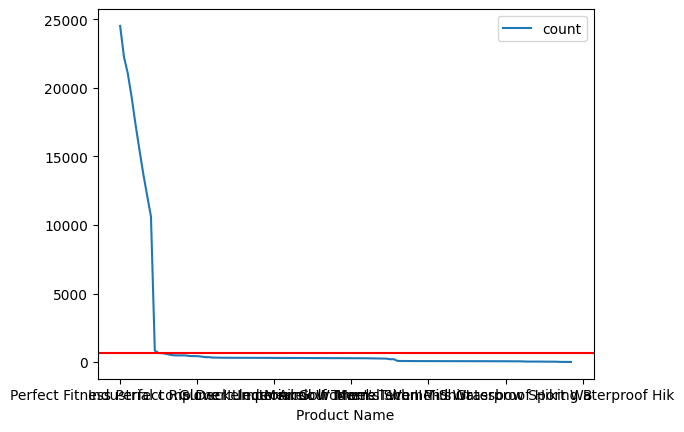

In [ ]:
k=pd.DataFrame(df['Product Name'].value_counts())
pd.DataFrame(df['Product Name'].value_counts()).plot()
plt.axhline(680,color='r')

In [ ]:
product_demand_type=pd.DataFrame(df['Product Name'].value_counts())['count'].apply((lambda x: 'Low_demand' if x <680 else 'High_demand')).to_dict()

In [ ]:
df['Product Name']=df['Product Name'].map(product_demand_type)
df['Product Name'].value_counts()

Product Name
High_demand    157272
Low_demand      23247
Name: count, dtype: int64

In [ ]:
df.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Fname,Customer Lname,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status,Product Image,Product Name,Product Status,shipping date (DateOrders),Shipping Mode,shipping date,shipping time,order date,order time,Intra_inter_city,Martket_type,Region_type
0,DEBIT,3,4,0,Sporting Goods,Caguas,Puerto Rico,Cally,Holloway,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,2018-01-31 22:56:00,77202,13.110000,0.04,180517,0.29,1,327.75,Southeast Asia,Java Occidental,COMPLETE,http://images.acmesports.sports/Smart+watch,Low_demand,0,2018-02-03 22:56:00,Standard Class,2018-02-03,22:56:00,2018-01-31,22:56:00,inter city,inter_market,inter_region
1,TRANSFER,5,4,1,Sporting Goods,Caguas,Puerto Rico,Irene,Luna,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,2018-01-13 12:27:00,75939,16.389999,0.05,179254,-0.80,1,327.75,South Asia,Rajastán,PENDING,http://images.acmesports.sports/Smart+watch,Low_demand,0,2018-01-18 12:27:00,Standard Class,2018-01-18,12:27:00,2018-01-13,12:27:00,inter city,inter_market,inter_region


In [ ]:
del df['shipping date (DateOrders)']

In [ ]:
# extract days of week from order date and shipping date do same with order and shipping time
df['shipping_week_day']=pd.to_datetime(df['shipping date']).dt.day_name()
df['order_week_day']=pd.to_datetime(df['order date']).dt.day_name()


In [ ]:
df['shipping_month'] = pd.to_datetime(df['shipping date']).dt.strftime('%B')
df['order_month'] = pd.to_datetime(df['order date']).dt.strftime('%B')


In [ ]:
df['shipping time']=df['shipping time'].astype(str).apply(lambda x : x[:2]).apply(lambda x:"Morning" if 6 <= int(x) <= 12 else "Afternoon" if 12 < int(x) <= 18 else "Night"   )
df['order time']=df['order time'].astype(str).apply(lambda x : x[:2]).apply(lambda x:"Morning" if 6 <= int(x) <= 12 else "Afternoon" if 12 < int(x) <= 18 else "Night"   )


In [ ]:
df.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Fname,Customer Lname,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status,Product Image,Product Name,Product Status,Shipping Mode,shipping date,shipping time,order date,order time,Intra_inter_city,Martket_type,Region_type,shipping_week_day,order_week_day,shipping_month,order_month
0,DEBIT,3,4,0,Sporting Goods,Caguas,Puerto Rico,Cally,Holloway,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,2018-01-31 22:56:00,77202,13.110000,0.04,180517,0.29,1,327.75,Southeast Asia,Java Occidental,COMPLETE,http://images.acmesports.sports/Smart+watch,Low_demand,0,Standard Class,2018-02-03,Night,2018-01-31,Night,inter city,inter_market,inter_region,Saturday,Wednesday,February,January
1,TRANSFER,5,4,1,Sporting Goods,Caguas,Puerto Rico,Irene,Luna,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,2018-01-13 12:27:00,75939,16.389999,0.05,179254,-0.80,1,327.75,South Asia,Rajastán,PENDING,http://images.acmesports.sports/Smart+watch,Low_demand,0,Standard Class,2018-01-18,Morning,2018-01-13,Morning,inter city,inter_market,inter_region,Thursday,Saturday,January,January


In [ ]:
['Customer City','Customer Country','Customer Fname','Customer Lname','Customer State','Customer Street','Customer Zipcode','Department Id','Latitude','Longitude',
 'Order City','Order Country','order date (DateOrders)','Order Id']

['Customer City',
 'Customer Country',
 'Customer Fname',
 'Customer Lname',
 'Customer State',
 'Customer Street',
 'Customer Zipcode',
 'Department Id',
 'Latitude',
 'Longitude',
 'Order City',
 'Order Country',
 'order date (DateOrders)',
 'Order Id']

In [ ]:
df['Discount_rate']=df['Order Item Discount Rate'].apply(lambda x: 'no discount' if round(x,2)==0.00 else 'upto 5% discount' if (round(x,2)<=0.05) else 'upto 15% discount' if (round(x,2)<=0.15 ) else 'upto 25% discount')

In [ ]:
df['Order_box_Quantity']=df['Order Item Quantity'].apply(lambda x: 'single_box' if x==1 else 'Multiple_box')

In [ ]:
df['Order_box_Quantity'].value_counts()

Order_box_Quantity
single_box      99134
Multiple_box    81385
Name: count, dtype: int64

In [ ]:
df.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Fname,Customer Lname,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status,Product Image,Product Name,Product Status,Shipping Mode,shipping date,shipping time,order date,order time,Intra_inter_city,Martket_type,Region_type,shipping_week_day,order_week_day,shipping_month,order_month,Discount_rate,Order_box_Quantity
0,DEBIT,3,4,0,Sporting Goods,Caguas,Puerto Rico,Cally,Holloway,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,2018-01-31 22:56:00,77202,13.110000,0.04,180517,0.29,1,327.75,Southeast Asia,Java Occidental,COMPLETE,http://images.acmesports.sports/Smart+watch,Low_demand,0,Standard Class,2018-02-03,Night,2018-01-31,Night,inter city,inter_market,inter_region,Saturday,Wednesday,February,January,upto 5% discount,single_box
1,TRANSFER,5,4,1,Sporting Goods,Caguas,Puerto Rico,Irene,Luna,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,2018-01-13 12:27:00,75939,16.389999,0.05,179254,-0.80,1,327.75,South Asia,Rajastán,PENDING,http://images.acmesports.sports/Smart+watch,Low_demand,0,Standard Class,2018-01-18,Morning,2018-01-13,Morning,inter city,inter_market,inter_region,Thursday,Saturday,January,January,upto 5% discount,single_box


In [ ]:
df['profitability']=df['Order Item Profit Ratio'].apply(lambda x: 'profitable_shipment' if x>=0 else 'non_profitable_shipment')

In [ ]:
df.drop(columns=['Customer City','Customer Country','Customer Fname','Customer Lname','Customer State','Customer Street','Customer Zipcode','Department Id','Latitude','Longitude',
 'Order City','Order Country','order date (DateOrders)','Order Id','Order Item Id','Order State','Product Image'],inplace=True)

In [ ]:
df.head(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Category Name,Customer Segment,Department Name,Market,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order Status,Product Name,Product Status,Shipping Mode,shipping date,shipping time,order date,order time,Intra_inter_city,Martket_type,Region_type,shipping_week_day,order_week_day,shipping_month,order_month,Discount_rate,Order_box_Quantity,profitability
0,DEBIT,3,4,0,Sporting Goods,Consumer,Fitness,Pacific Asia,13.110000,0.04,0.29,1,327.75,Southeast Asia,COMPLETE,Low_demand,0,Standard Class,2018-02-03,Night,2018-01-31,Night,inter city,inter_market,inter_region,Saturday,Wednesday,February,January,upto 5% discount,single_box,profitable_shipment
1,TRANSFER,5,4,1,Sporting Goods,Consumer,Fitness,Pacific Asia,16.389999,0.05,-0.80,1,327.75,South Asia,PENDING,Low_demand,0,Standard Class,2018-01-18,Morning,2018-01-13,Morning,inter city,inter_market,inter_region,Thursday,Saturday,January,January,upto 5% discount,single_box,non_profitable_shipment
2,CASH,4,4,0,Sporting Goods,Consumer,Fitness,Pacific Asia,18.030001,0.06,-0.80,1,327.75,South Asia,CLOSED,Low_demand,0,Standard Class,2018-01-17,Morning,2018-01-13,Morning,inter city,inter_market,inter_region,Wednesday,Saturday,January,January,upto 15% discount,single_box,non_profitable_shipment


In [ ]:
(((df['shipping date']-df['order date']).astype(str).apply(lambda x: x[:1])).astype(int)==df['Days for shipping (real)']).all()

# hence we remove these two columns
df.drop(columns=['shipping date','order date'],inplace=True)

In [ ]:
df['schedule-real']=df['Days for shipment (scheduled)']-df['Days for shipping (real)']
df.drop(columns=['Days for shipment (scheduled)','Days for shipping (real)'],inplace=True)

In [ ]:
df.head()

,Type,Late_delivery_risk,Category Name,Customer Segment,Department Name,Market,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order Status,Product Name,Product Status,Shipping Mode,shipping time,order time,Intra_inter_city,Martket_type,Region_type,shipping_week_day,order_week_day,shipping_month,order_month,Discount_rate,Order_box_Quantity,profitability,schedule-real
0,DEBIT,0,Sporting Goods,Consumer,Fitness,Pacific Asia,13.110000,0.04,0.29,1,327.75,Southeast Asia,COMPLETE,Low_demand,0,Standard Class,Night,Night,inter city,inter_market,inter_region,Saturday,Wednesday,February,January,upto 5% discount,single_box,profitable_shipment,1
1,TRANSFER,1,Sporting Goods,Consumer,Fitness,Pacific Asia,16.389999,0.05,-0.80,1,327.75,South Asia,PENDING,Low_demand,0,Standard Class,Morning,Morning,inter city,inter_market,inter_region,Thursday,Saturday,January,January,upto 5% discount,single_box,non_profitable_shipment,-1
2,CASH,0,Sporting Goods,Consumer,Fitness,Pacific Asia,18.030001,0.06,-0.80,1,327.75,South Asia,CLOSED,Low_demand,0,Standard Class,Morning,Morning,inter city,inter_market,inter_region,Wednesday,Saturday,January,January,upto 15% discount,single_box,non_profitable_shipment,0
3,DEBIT,0,Sporting Goods,Home Office,Fitness,Pacific Asia,22.940001,0.07,0.08,1,327.75,Oceania,COMPLETE,Low_demand,0,Standard Class,Morning,Morning,inter city,inter_market,inter_region,Tuesday,Saturday,January,January,upto 15% discount,single_box,profitable_shipment,1
4,PAYMENT,0,Sporting Goods,Corporate,Fitness,Pacific Asia,29.500000,0.09,0.45,1,327.75,Oceania,PENDING_PAYMENT,Low_demand,0,Standard Class,Morning,Morning,inter city,inter_market,inter_region,Monday,Saturday,January,January,upto 15% discount,single_box,profitable_shipment,2


In [ ]:
df['Product Status'].value_counts()

Product Status
0    180519
Name: count, dtype: int64

In [ ]:
# All prodcuts are availabe so droping this column 'Product Status'
df.drop(columns=['Product Status'],inplace=True)
df.isnull().sum()[df.isnull().sum()>0]
# no null value

Series([], dtype: int64)

# Univarite Analysis

In [ ]:
df.select_dtypes(include=np.number).columns

Index(['Late_delivery_risk', 'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'schedule-real'],
      dtype='object')

In [ ]:
df.head(2)

,Type,Late_delivery_risk,Category Name,Customer Segment,Department Name,Market,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order Status,Product Name,Shipping Mode,shipping time,order time,Intra_inter_city,Martket_type,Region_type,shipping_week_day,order_week_day,shipping_month,order_month,Discount_rate,Order_box_Quantity,profitability,schedule-real
0,DEBIT,0,Sporting Goods,Consumer,Fitness,Pacific Asia,13.110000,0.04,0.29,1,327.75,Southeast Asia,COMPLETE,Low_demand,Standard Class,Night,Night,inter city,inter_market,inter_region,Saturday,Wednesday,February,January,upto 5% discount,single_box,profitable_shipment,1
1,TRANSFER,1,Sporting Goods,Consumer,Fitness,Pacific Asia,16.389999,0.05,-0.80,1,327.75,South Asia,PENDING,Low_demand,Standard Class,Morning,Morning,inter city,inter_market,inter_region,Thursday,Saturday,January,January,upto 5% discount,single_box,non_profitable_shipment,-1


In [ ]:
num_cols=['Order Item Discount','Order Item Profit Ratio','Sales']
cat_cols=[]

for i in df.columns:
  if i not in num_cols:
    cat_cols.append(i)


In [ ]:
print('num_cols: ',num_cols)
print('\ncat_cols: ',cat_cols)

num_cols:  ['Order Item Discount', 'Order Item Profit Ratio', 'Sales']

cat_cols:  ['Type', 'Late_delivery_risk', 'Category Name', 'Customer Segment', 'Department Name', 'Market', 'Order Item Discount Rate', 'Order Item Quantity', 'Order Region', 'Order Status', 'Product Name', 'Shipping Mode', 'shipping time', 'order time', 'Intra_inter_city', 'Martket_type', 'Region_type', 'shipping_week_day', 'order_week_day', 'shipping_month', 'order_month', 'Discount_rate', 'Order_box_Quantity', 'profitability', 'schedule-real']


In [ ]:
import plotly.express as ex

In [ ]:
for i in cat_cols:
  # Create the countplot
  df1=df.groupby(i).size().rename('Count').reset_index()
  fig=px.bar(df1,x=i,y='Count',color=i,text='Count')


  # Show the plot
  fig.show()

# Bivariate Analysis

In [ ]:
for i in cat_cols:
  if i !="Late_delivery_risk":

      # Group the data by the category and calculate the sum of Late_delivery_risk

      df1=df.groupby([i,'Late_delivery_risk']).size().rename('Count').reset_index()
      fig=px.bar(df1,x=i,y='Count',color='Late_delivery_risk',text='Count')

      # Show the plot
      fig.show()

In [ ]:
df.groupby([i,'Late_delivery_risk']).size()

schedule-real  Late_delivery_risk
-4             0                       286
               1                      6697
-3             0                       280
               1                      6772
-2             0                      1167
               1                     27551
-1             0                      2690
               1                     57957
 0             0                     33753
 1             0                     21700
 2             0                     21666
dtype: int64

# Statistical Analysis

In [ ]:
# Chi Square test of indenpendence ,
# checking column dependent column is depedent or not with categorial columns

In [ ]:
import scipy.stats as stats

# h0: Variables are independent
# h1: Variables are dependent
alternative_hypothesis='Variables are dependent'
null_hypothesis='Variables are independent'
dependent_variables=[]
independent_variables=[]
for i in cat_cols:
    # Create a cross-tabulation between the current column and the target column
    df1 = pd.crosstab(df[i], df["Late_delivery_risk"])

    # Perform the chi-square test of independence
    chi2, p, dof, expected = stats.chi2_contingency(df1)

    if p < 0.05:
      dependent_variables.append(i)
      print(f"Reject the null hypothesis. {alternative_hypothesis}, {i} with 'palue':{p}")
    else:
      independent_variables.append(i)
      print(f"Fail to reject the null hypothesis.  {null_hypothesis}, {i} with 'palue':{p}")




Reject the null hypothesis. Variables are dependent, Type with 'palue':5.128672571053333e-239
Reject the null hypothesis. Variables are dependent, Late_delivery_risk with 'palue':0.0
Fail to reject the null hypothesis.  Variables are independent, Category Name with 'palue':0.7179808169070767
Fail to reject the null hypothesis.  Variables are independent, Customer Segment with 'palue':0.5990740516327164
Fail to reject the null hypothesis.  Variables are independent, Department Name with 'palue':0.7564916045517328
Fail to reject the null hypothesis.  Variables are independent, Market with 'palue':0.07044822520489222
Reject the null hypothesis. Variables are dependent, Order Item Discount Rate with 'palue':0.022128938898305577
Fail to reject the null hypothesis.  Variables are independent, Order Item Quantity with 'palue':0.5990510769481232
Reject the null hypothesis. Variables are dependent, Order Region with 'palue':1.083129807862368e-07
Reject the null hypothesis. Variables are depende

In [ ]:
print('dependent_variables:',dependent_variables)
print('independnet_variables:',independent_variables)


dependent_variables: ['Type', 'Late_delivery_risk', 'Order Item Discount Rate', 'Order Region', 'Order Status', 'Product Name', 'Shipping Mode', 'shipping time', 'order time', 'schedule-real']
independnet_variables: ['Category Name', 'Customer Segment', 'Department Name', 'Market', 'Order Item Quantity', 'Intra_inter_city', 'Martket_type', 'Region_type', 'shipping_week_day', 'order_week_day', 'shipping_month', 'order_month', 'Discount_rate', 'Order_box_Quantity', 'profitability']


In [ ]:
df[independent_variables].head(3)

,Category Name,Customer Segment,Department Name,Market,Order Item Quantity,Intra_inter_city,Martket_type,Region_type,shipping_week_day,order_week_day,shipping_month,order_month,Discount_rate,Order_box_Quantity,profitability
0,Sporting Goods,Consumer,Fitness,Pacific Asia,1,inter city,inter_market,inter_region,Saturday,Wednesday,February,January,upto 5% discount,single_box,profitable_shipment
1,Sporting Goods,Consumer,Fitness,Pacific Asia,1,inter city,inter_market,inter_region,Thursday,Saturday,January,January,upto 5% discount,single_box,non_profitable_shipment
2,Sporting Goods,Consumer,Fitness,Pacific Asia,1,inter city,inter_market,inter_region,Wednesday,Saturday,January,January,upto 15% discount,single_box,non_profitable_shipment


In [ ]:
df[dependent_variables].head(2)

,Type,Late_delivery_risk,Order Item Discount Rate,Order Region,Order Status,Product Name,Shipping Mode,shipping time,order time,schedule-real
0,DEBIT,0,0.04,Southeast Asia,COMPLETE,Low_demand,Standard Class,Night,Night,1
1,TRANSFER,1,0.05,South Asia,PENDING,Low_demand,Standard Class,Morning,Morning,-1


In [ ]:
del df['Department Name']

Data Processing for ML Model
* Encoding

In [ ]:
num_cols=df.select_dtypes(include=np.number).columns
cat_cols=df.select_dtypes(include='object').columns

In [ ]:
len(cat_cols)

20

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in ['Category Name','Order Region','shipping_week_day','order_week_day','shipping_month','order_month']:
  df[i]=label_encoder.fit_transform(df[i])

In [ ]:
num_cols=df.select_dtypes(include=np.number).columns
cat_cols=df.select_dtypes(include='object').columns

In [ ]:
dummy=pd.get_dummies(df[cat_cols],drop_first=True,dtype=int)

In [ ]:
df_=pd.concat([df[num_cols],dummy],axis=1)

# Base Model

<Axes: >

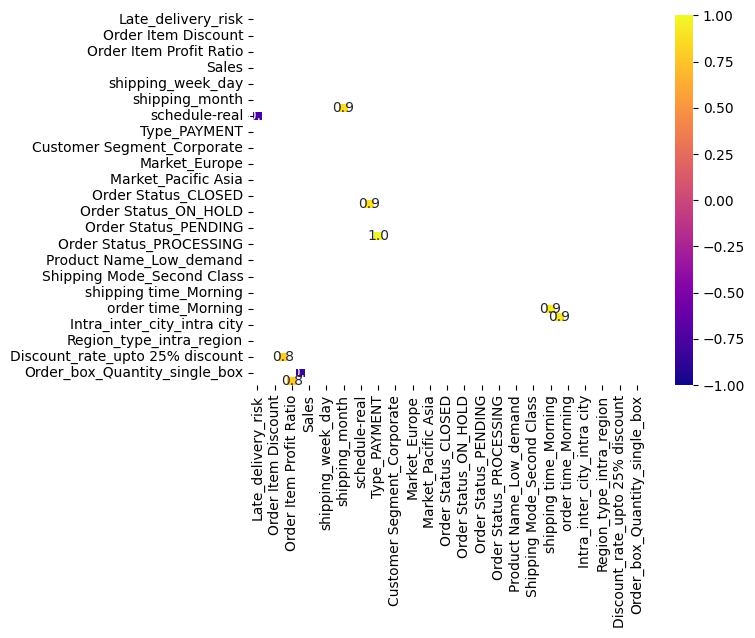

In [ ]:
sns.heatmap(df_.corr()[abs(df_.corr())>.7],cmap='plasma',vmax=1,vmin=-1,mask=np.triu(df_.corr()),fmt='.1f',annot=True)

In [ ]:
# import statsmodels.api as sma
x=df_.drop(columns=['Late_delivery_risk','schedule-real'])

y=df['Late_delivery_risk']

# base_model=sma.Logit(y,sma.add_constant(x)).fit()
# print(base_model.summary())

In [ ]:
# Checking Multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = x.columns
vif['vif_value'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [ ]:
vif

,features,vif_value
0,Category Name,1.204658
1,Order Item Discount,5.451318
2,Order Item Discount Rate,9.630511
3,Order Item Profit Ratio,2.425092
4,Order Item Quantity,4.243786
5,Sales,3.409611
6,Order Region,2.014981
7,shipping_week_day,1.049902
8,order_week_day,1.050103
9,shipping_month,4.227733


In [ ]:
# droping order status columns
x_=x.drop(columns=['Order Status_CLOSED', 'Order Status_COMPLETE', 'Order Status_ON_HOLD',
       'Order Status_PAYMENT_REVIEW', 'Order Status_PENDING',
       'Order Status_PENDING_PAYMENT', 'Order Status_PROCESSING',
       'Order Status_SUSPECTED_FRAUD'])

vif = pd.DataFrame()
vif['features'] = x_.columns
vif['vif_value'] = [variance_inflation_factor(x_.values, i) for i in range(x_.shape[1])]

In [ ]:
vif

,features,vif_value
0,Category Name,5.262233
1,Order Item Discount,9.876374
2,Order Item Discount Rate,29.352215
3,Order Item Profit Ratio,2.487381
4,Order Item Quantity,11.198210
5,Sales,10.994033
6,Order Region,7.709500
7,shipping_week_day,3.305310
8,order_week_day,3.293266
9,shipping_month,14.853262


In [ ]:
x_.columns

Index(['Category Name', 'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Region', 'shipping_week_day', 'order_week_day', 'shipping_month',
       'order_month', 'Type_DEBIT', 'Type_PAYMENT', 'Type_TRANSFER',
       'Customer Segment_Corporate', 'Customer Segment_Home Office',
       'Market_Europe', 'Market_LATAM', 'Market_Pacific Asia', 'Market_USCA',
       'Product Name_Low_demand', 'Shipping Mode_Same Day',
       'Shipping Mode_Second Class', 'Shipping Mode_Standard Class',
       'shipping time_Morning', 'shipping time_Night', 'order time_Morning',
       'order time_Night', 'Intra_inter_city_intra city',
       'Martket_type_intra_market', 'Region_type_intra_region',
       'Discount_rate_upto 15% discount', 'Discount_rate_upto 25% discount',
       'Discount_rate_upto 5% discount', 'Order_box_Quantity_single_box',
       'profitability_profitable_shipment'],
      dtype='object')

In [ ]:
import statsmodels.api as sma
x=x_

y=df['Late_delivery_risk']

base_model=sma.Logit(y,sma.add_constant(x)).fit()
print(base_model.summary())

Optimization terminated successfully.
         Current function value: 0.543399
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:     Late_delivery_risk   No. Observations:               180519
Model:                          Logit   Df Residuals:                   180482
Method:                           MLE   Df Model:                           36
Date:                Tue, 04 Jun 2024   Pseudo R-squ.:                  0.2107
Time:                        13:03:45   Log-Likelihood:                -98094.
converged:                       True   LL-Null:                   -1.2428e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 3.2489      0.062     52

<Axes: >

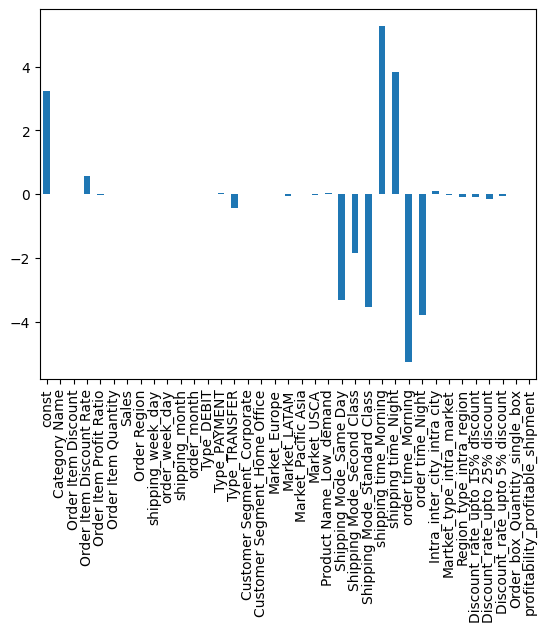

In [ ]:
base_model.params.plot(kind='bar')

In [ ]:
base_pvalue=base_model.pvalues.to_dict()
base_significant=[]
for i,j in base_pvalue.items():
  if j<.05:
    base_significant.append(i)
    print(f'Significant column with pvalue {round(j,4)} and column name : {i}')
  else:
    print(f'Insignificant column with pvalue {round(j,4)} and column name : {i}')




Significant column with pvalue 0.0 and column name : const
Insignificant column with pvalue 0.1267 and column name : Category Name
Insignificant column with pvalue 0.9016 and column name : Order Item Discount
Significant column with pvalue 0.0173 and column name : Order Item Discount Rate
Insignificant column with pvalue 0.3022 and column name : Order Item Profit Ratio
Insignificant column with pvalue 0.574 and column name : Order Item Quantity
Insignificant column with pvalue 0.3429 and column name : Sales
Insignificant column with pvalue 0.1497 and column name : Order Region
Insignificant column with pvalue 0.0518 and column name : shipping_week_day
Insignificant column with pvalue 0.6442 and column name : order_week_day
Significant column with pvalue 0.0093 and column name : shipping_month
Significant column with pvalue 0.0052 and column name : order_month
Insignificant column with pvalue 0.2629 and column name : Type_DEBIT
Significant column with pvalue 0.0246 and column name : Typ

In [ ]:
print('Significant columns: ',base_significant)
print('significant columsn:',len(base_significant))
print('insignificant columns :',len(x.columns)-len(base_significant))
len(x.columns)

Significant columns:  ['const', 'Order Item Discount Rate', 'shipping_month', 'order_month', 'Type_PAYMENT', 'Type_TRANSFER', 'Shipping Mode_Same Day', 'Shipping Mode_Second Class', 'Shipping Mode_Standard Class', 'shipping time_Morning', 'shipping time_Night', 'order time_Morning', 'order time_Night', 'Region_type_intra_region', 'Discount_rate_upto 15% discount', 'Discount_rate_upto 25% discount', 'Discount_rate_upto 5% discount']
significant columsn: 17
insignificant columns : 19


36

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Define the dataset and target variable
# (Assume you have already loaded your data into X and y variables)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (144415, 36)
y_train shape: (144415,)
X_test shape: (36104, 36)
y_test shape: (36104,)


In [ ]:
# Import necessary libraries
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

# Define the dataset and target variable
# (Assume you have already loaded your data into X and y variables)

# Define the model
model = LogisticRegression()

# Define the cross-validation strategy
kfold = KFold(n_splits=5, shuffle=True)

# Evaluate the model using cross-validation
scores = cross_val_score(model, x, y, cv=kfold)

# Print the average cross-validation score
print("Average cross-validation score:", scores.mean())

Average cross-validation score: 0.6881824381639848


**proving statistically train and test are true resp. of popupation y**




In [ ]:
expected=y.value_counts(normalize=True).values
observed_train=y_train.value_counts(normalize=True).values
observed_test=y_test.value_counts(normalize=True).values

In [ ]:
import scipy.stats as stats

p_value=stats.chisquare(observed_test,expected).pvalue
if p_value<.05:
    print('Rejec h0 : observed test and expected not are same ')
else:
    print('Faill to reject H0: Observed test and expected are same')

Faill to reject H0: Observed test and expected are same


In [ ]:
p_value=stats.chisquare(observed_train,expected).pvalue
if p_value<.05:
    print('Rejec h0 : observed train and expected not are same ')
else:
    print('Faill to reject H0: Observed train and expected are same')

Faill to reject H0: Observed train and expected are same


In [ ]:
base_model_train=sma.Logit(y_train,sma.add_constant(X_train)).fit()
base_model_train.summary()

Optimization terminated successfully.
         Current function value: 0.542747
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Late_delivery_risk   No. Observations:               144415
Model:                          Logit   Df Residuals:                   144378
Method:                           MLE   Df Model:                           36
Date:                Tue, 04 Jun 2024   Pseudo R-squ.:                  0.2117
Time:                        13:03:57   Log-Likelihood:                -78381.
converged:                       True   LL-Null:                       -99427.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 3.3033      0.069     47.560      0.000       3.167       3.439
Category Name                        -0.0006      0.000     -1.242      0.214      -0.002       0.000
Order Item Discount                  -0.0001      0.001     -0.219      0.827      -0.001       0.001
Order Item Discount Rate              0.5973      0.268      2.227      0.026       0.072       1.123
Order Item Profit Ratio              -0.0110      0.020     -0.541      0.588      -0.051       0.029
Order Item Quantity                   0.0004      0.009      0.051      0.959      -0.017       0.017
Sales                             -4.632e-05   8.42e-05     -0.550      0.582      -0.000       0.000
Order Region                         -0.0017      0.001     -1.406      0.160      -0.004       0.001
shipping_week_day                    -0.0057      0.003     -1.807      0.071      -0.012       0.000
order_week_day                       -0.0031      0.003     -0.989      0.323      -0.009       0.003
shipping_month                        0.0102      0.004      2.904      0.004       0.003       0.017
order_month                          -0.0113      0.004     -3.195      0.001      -0.018      -0.004
Type_DEBIT                            0.0162      0.021      0.772      0.440      -0.025       0.057
Type_PAYMENT                          0.0458      0.022      2.050      0.040       0.002       0.090
Type_TRANSFER                        -0.4307      0.022    -19.627      0.000      -0.474      -0.388
Customer Segment_Corporate           -0.0124      0.014     -0.891      0.373      -0.040       0.015
Customer Segment_Home Office          0.0005      0.017      0.031      0.975      -0.032       0.034
Market_Europe                        -0.0067      0.030     -0.226      0.821      -0.065       0.052
Market_LATAM                         -0.0738      0.029     -2.550      0.011      -0.130      -0.017
Market_Pacific Asia                  -0.0335      0.028     -1.214      0.225      -0.087       0.021
Market_USCA                          -0.0345      0.030     -1.152      0.249      -0.093       0.024
Product Name_Low_demand               0.0114      0.019      0.610      0.542      -0.025       0.048
Shipping Mode_Same Day               -3.3632      0.050    -66.740      0.000      -3.462      -3.264
Shipping Mode_Second Class           -1.8722      0.035    -53.160      0.000      -1.941      -1.803
Shipping Mode_Standard Class         -3.5664      0.033   -107.916      0.000      -3.631      -3.502
shipping time_Morning                 5.2492      0.124     42.233      0.000       5.006       5.493
shipping time_Night                   3.8313      0.118     32.588      0.000       3.601       4.062
order time_Morning                   -5.2342      0.124    -42.182      0.000      -5.477      -4.991
order time_Night                     -3.7986      0.117    -32.347      0.000  

In [ ]:
# Accuracy .

from sklearn.metrics import accuracy_score

In [ ]:
pred=(base_model_train.predict(sma.add_constant(X_test))).apply(lambda x: 1 if x>.5 else 0)

In [ ]:
print(accuracy_score(y_test,pred))

0.711527808553069


In [ ]:
# What is Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement.

from sklearn.metrics import precision_score,recall_score,f1_score

print('Precision_score: ',precision_score(y_test,pred))
print('Recall_score: ',recall_score(y_test,pred))
print('F1_score: ',f1_score(y_test,pred))

Precision_score:  0.8473271138753147
Recall_score:  0.5780673839470627
F1_score:  0.6872654115244873


In [ ]:
# Which variables are significant?
print('Significant columns')
pd.DataFrame(base_model_train.pvalues,columns=['pvalue'])[pd.DataFrame(base_model_train.pvalues,columns=['pvalue'])['pvalue']<.05]

Significant columns


,pvalue
const,0.000000e+00
Order Item Discount Rate,2.597873e-02
shipping_month,3.681677e-03
order_month,1.397379e-03
Type_PAYMENT,4.032494e-02
Type_TRANSFER,9.006477e-86
Market_LATAM,1.077993e-02
Shipping Mode_Same Day,0.000000e+00
Shipping Mode_Second Class,0.000000e+00
Shipping Mode_Standard Class,0.000000e+00


In [ ]:
sig_column=pd.DataFrame(base_model_train.pvalues,columns=['pvalue'])[pd.DataFrame(base_model_train.pvalues,columns=['pvalue'])['pvalue']<.05].index

In [ ]:
insig_column=pd.DataFrame(base_model_train.pvalues,columns=['pvalue'])[pd.DataFrame(base_model_train.pvalues,columns=['pvalue'])['pvalue']>.05].index

In [ ]:
print('Significant columns\n',sig_column)
print('='*100)
print('Insignificant columns\n',insig_column)

Significant columns
 Index(['const', 'Order Item Discount Rate', 'shipping_month', 'order_month',
       'Type_PAYMENT', 'Type_TRANSFER', 'Market_LATAM',
       'Shipping Mode_Same Day', 'Shipping Mode_Second Class',
       'Shipping Mode_Standard Class', 'shipping time_Morning',
       'shipping time_Night', 'order time_Morning', 'order time_Night',
       'Region_type_intra_region', 'Discount_rate_upto 15% discount',
       'Discount_rate_upto 25% discount'],
      dtype='object')
Insignificant columns
 Index(['Category Name', 'Order Item Discount', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Region', 'shipping_week_day',
       'order_week_day', 'Type_DEBIT', 'Customer Segment_Corporate',
       'Customer Segment_Home Office', 'Market_Europe', 'Market_Pacific Asia',
       'Market_USCA', 'Product Name_Low_demand', 'Intra_inter_city_intra city',
       'Martket_type_intra_market', 'Discount_rate_upto 5% discount',
       'Order_box_Quantity_single_box', '

In [ ]:
#  Cohen’s Kappa Value
from sklearn.metrics import cohen_kappa_score

print('cohen_kappa_score',cohen_kappa_score(y_test,pred))

cohen_kappa_score 0.4367664158412462


In [ ]:


from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve

print('classification_report: \n',classification_report(y_test,pred))

classification_report: 
               precision    recall  f1-score   support

           0       0.63      0.87      0.73     16307
           1       0.85      0.58      0.69     19797

    accuracy                           0.71     36104
   macro avg       0.74      0.73      0.71     36104
weighted avg       0.75      0.71      0.71     36104



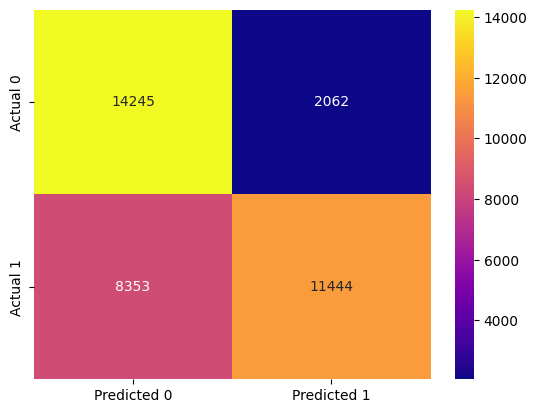

In [ ]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,pred),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1']),
            annot=True,cmap='plasma',fmt='.0f');

roc_auc_score 0.7629449304752429


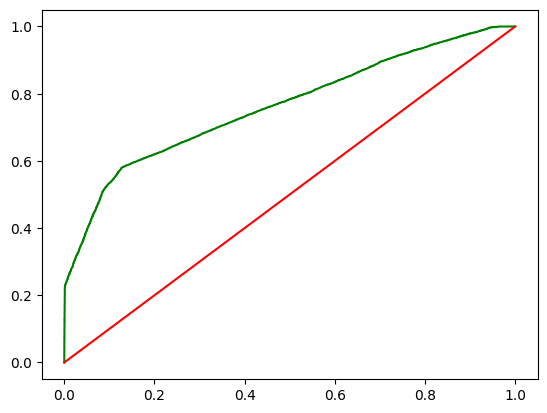

In [ ]:
fpr,tpr,_=roc_curve(y_test,base_model_train.predict(sma.add_constant(X_test)))
plt.plot(fpr,tpr,color='g')
plt.plot([0,1],[0,1], color='r')

print('roc_auc_score',roc_auc_score(y_test,base_model_train.predict(sma.add_constant(X_test))))


In [ ]:
mod=[]
acc=[]
pre=[]
rec=[]
f1=[]
def model_cal(model,xtrain,ytrain,xtest,ytest):
    m=model
    m.fit(xtrain,ytrain)
    pred=m.predict(xtest)
    prob=m.predict_proba(xtest)[:,1]
    print('-'*100)
    print(str(model))
    print('-'*100)
    print('Confusion Matrix :',confusion_matrix(ytest,pred))
    print('Classification Report :',classification_report(ytest,pred))
    print('ROC AUC :',roc_auc_score(ytest,prob))

    fpr,tpr,_=roc_curve(ytest,prob)
    plt.plot(fpr,tpr,color='g')
    plt.plot([0,1],[0,1], color='r')
    plt.show()
    print('**/\**')

    response='y'
    if response.lower()=='y':
        mod.append(str(m))
        acc.append(accuracy_score(ytest,pred))
        rec.append(recall_score(ytest,pred))
        pre.append(precision_score(ytest,pred))
        f1.append(f1_score(ytest,pred))
        global summary_df
        summary_df=pd.DataFrame({'Model':mod,'Accuracy':acc,
                                'Recall':rec,'Precision':pre,'f1_score':f1})
    else:
        return


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,ExtraTreesClassifier,HistGradientBoostingClassifier,RandomForestClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier,XGBClassifier

In [ ]:
modd=[LogisticRegression(),DecisionTreeClassifier(),GaussianNB(),
     AdaBoostClassifier(),BaggingClassifier(),GradientBoostingClassifier(),
      ExtraTreesClassifier(),HistGradientBoostingClassifier(),RandomForestClassifier(),
     XGBRFClassifier(),XGBClassifier()]

----------------------------------------------------------------------------------------------------
LogisticRegression()
----------------------------------------------------------------------------------------------------
Confusion Matrix : [[13126  3181]
 [ 8039 11758]]
Classification Report :               precision    recall  f1-score   support

           0       0.62      0.80      0.70     16307
           1       0.79      0.59      0.68     19797

    accuracy                           0.69     36104
   macro avg       0.70      0.70      0.69     36104
weighted avg       0.71      0.69      0.69     36104

ROC AUC : 0.7176206838157528


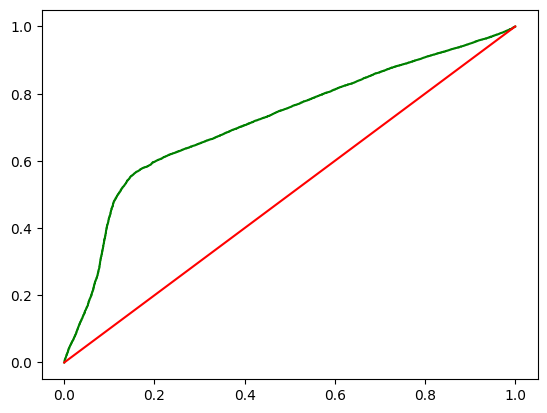

**/\**
----------------------------------------------------------------------------------------------------
DecisionTreeClassifier()
----------------------------------------------------------------------------------------------------
Confusion Matrix : [[14867  1440]
 [ 1491 18306]]
Classification Report :               precision    recall  f1-score   support

           0       0.91      0.91      0.91     16307
           1       0.93      0.92      0.93     19797

    accuracy                           0.92     36104
   macro avg       0.92      0.92      0.92     36104
weighted avg       0.92      0.92      0.92     36104

ROC AUC : 0.9181899614006679


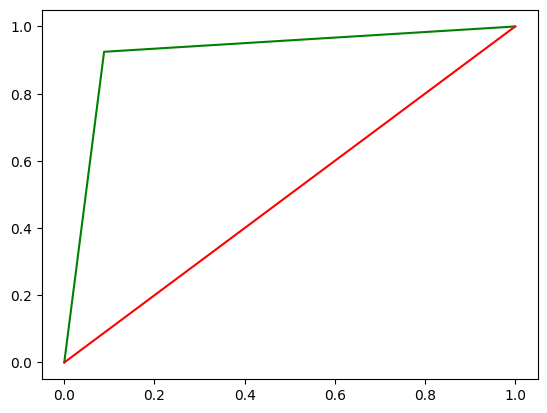

**/\**
----------------------------------------------------------------------------------------------------
GaussianNB()
----------------------------------------------------------------------------------------------------
Confusion Matrix : [[14361  1946]
 [ 9201 10596]]
Classification Report :               precision    recall  f1-score   support

           0       0.61      0.88      0.72     16307
           1       0.84      0.54      0.66     19797

    accuracy                           0.69     36104
   macro avg       0.73      0.71      0.69     36104
weighted avg       0.74      0.69      0.68     36104

ROC AUC : 0.7072518509055669


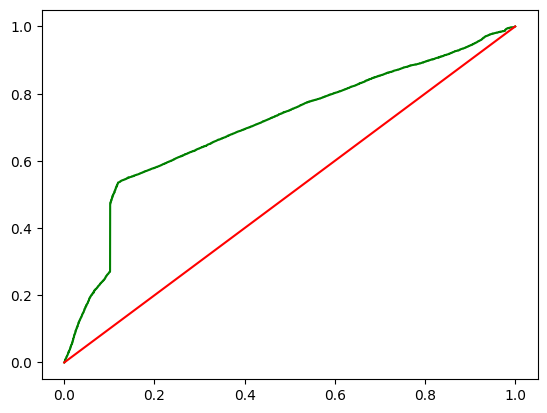

**/\**
----------------------------------------------------------------------------------------------------
AdaBoostClassifier()
----------------------------------------------------------------------------------------------------
Confusion Matrix : [[14245  2062]
 [ 8353 11444]]
Classification Report :               precision    recall  f1-score   support

           0       0.63      0.87      0.73     16307
           1       0.85      0.58      0.69     19797

    accuracy                           0.71     36104
   macro avg       0.74      0.73      0.71     36104
weighted avg       0.75      0.71      0.71     36104

ROC AUC : 0.7564344324116494


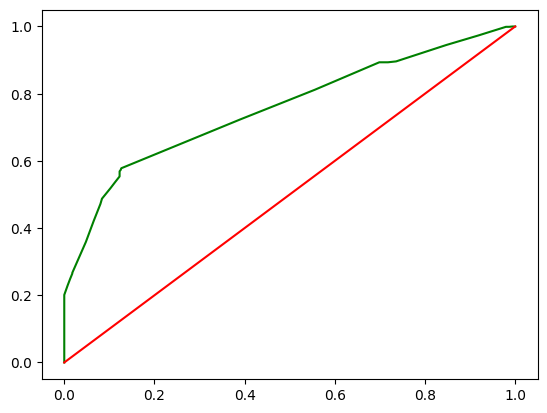

**/\**
----------------------------------------------------------------------------------------------------
BaggingClassifier()
----------------------------------------------------------------------------------------------------
Confusion Matrix : [[15582   725]
 [  704 19093]]
Classification Report :               precision    recall  f1-score   support

           0       0.96      0.96      0.96     16307
           1       0.96      0.96      0.96     19797

    accuracy                           0.96     36104
   macro avg       0.96      0.96      0.96     36104
weighted avg       0.96      0.96      0.96     36104

ROC AUC : 0.9887342111441991


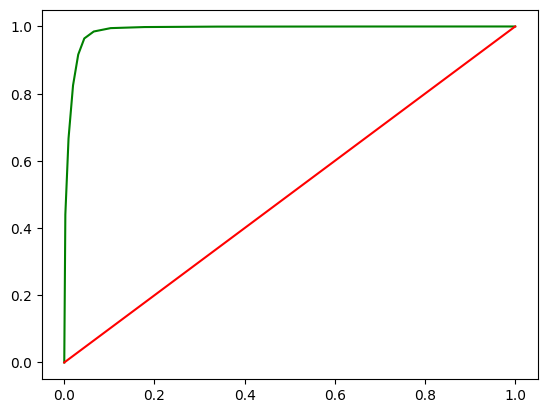

**/\**
----------------------------------------------------------------------------------------------------
GradientBoostingClassifier()
----------------------------------------------------------------------------------------------------
Confusion Matrix : [[14079  2228]
 [ 1836 17961]]
Classification Report :               precision    recall  f1-score   support

           0       0.88      0.86      0.87     16307
           1       0.89      0.91      0.90     19797

    accuracy                           0.89     36104
   macro avg       0.89      0.89      0.89     36104
weighted avg       0.89      0.89      0.89     36104

ROC AUC : 0.9336318130155561


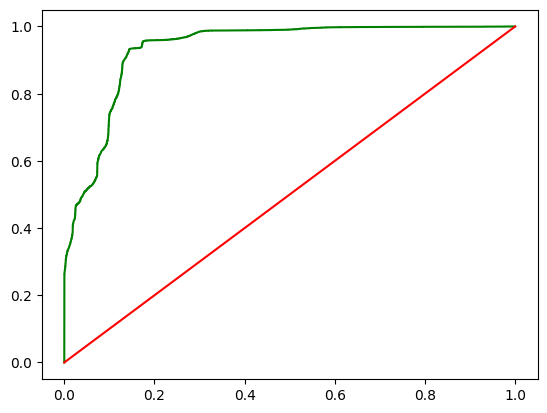

**/\**
----------------------------------------------------------------------------------------------------
ExtraTreesClassifier()
----------------------------------------------------------------------------------------------------
Confusion Matrix : [[14382  1925]
 [ 3362 16435]]
Classification Report :               precision    recall  f1-score   support

           0       0.81      0.88      0.84     16307
           1       0.90      0.83      0.86     19797

    accuracy                           0.85     36104
   macro avg       0.85      0.86      0.85     36104
weighted avg       0.86      0.85      0.85     36104

ROC AUC : 0.9369951190268352


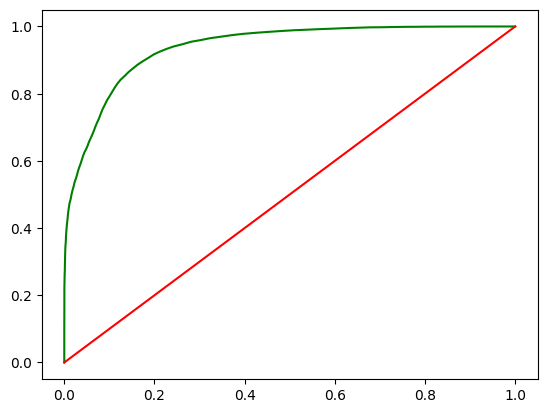

**/\**
----------------------------------------------------------------------------------------------------
HistGradientBoostingClassifier()
----------------------------------------------------------------------------------------------------
Confusion Matrix : [[15395   912]
 [   13 19784]]
Classification Report :               precision    recall  f1-score   support

           0       1.00      0.94      0.97     16307
           1       0.96      1.00      0.98     19797

    accuracy                           0.97     36104
   macro avg       0.98      0.97      0.97     36104
weighted avg       0.98      0.97      0.97     36104

ROC AUC : 0.9890802542971893


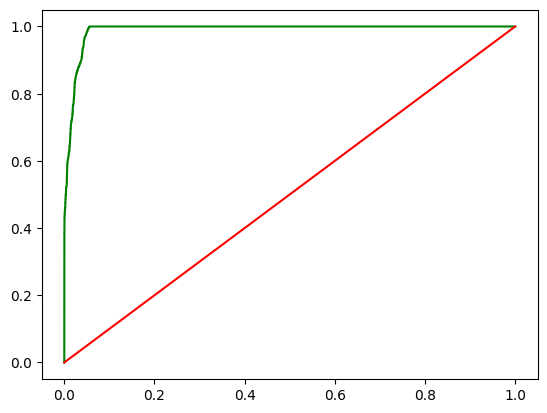

**/\**
----------------------------------------------------------------------------------------------------
RandomForestClassifier()
----------------------------------------------------------------------------------------------------
Confusion Matrix : [[14497  1810]
 [ 2241 17556]]
Classification Report :               precision    recall  f1-score   support

           0       0.87      0.89      0.88     16307
           1       0.91      0.89      0.90     19797

    accuracy                           0.89     36104
   macro avg       0.89      0.89      0.89     36104
weighted avg       0.89      0.89      0.89     36104

ROC AUC : 0.9565566445332928


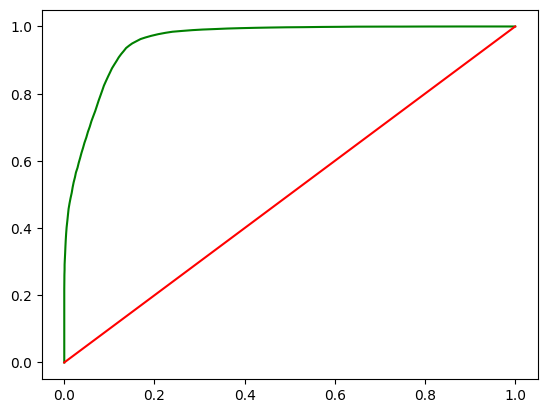

**/\**
----------------------------------------------------------------------------------------------------
XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)
----------------------------------------------------------------------------------------------

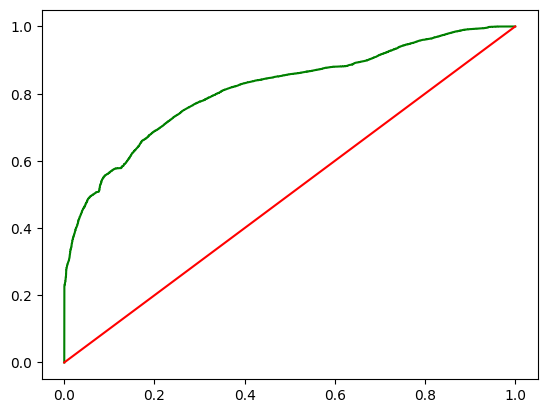

**/\**
----------------------------------------------------------------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
----------------------------------------------------------------------------------------------------
Confusion Matrix : [[15421   886]

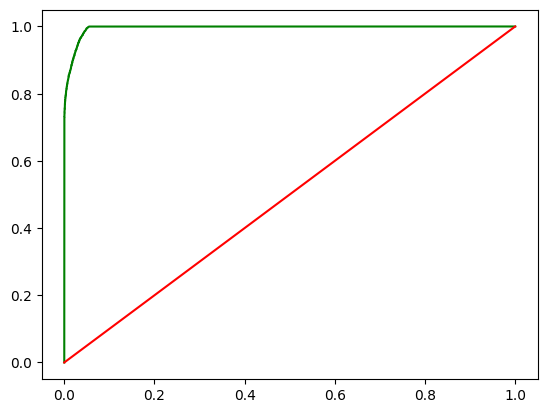

**/\**


In [ ]:
for i in modd:
    model_cal(i,X_train,y_train,X_test,y_test)

In [ ]:
summary_df.sort_values(by=['Recall','Precision'],ascending=False)

,Model,Accuracy,Recall,Precision,f1_score
7,HistGradientBoostingClassifier(),0.974380,0.999343,0.955934,0.977157
10,"XGBClassifier(base_score=None, booster=None, c...",0.975072,0.999293,0.957134,0.977759
4,BaggingClassifier(),0.960420,0.964439,0.963417,0.963928
1,DecisionTreeClassifier(),0.918818,0.924686,0.927074,0.925878
5,GradientBoostingClassifier(),0.887436,0.907259,0.889643,0.898364
8,RandomForestClassifier(),0.887796,0.886801,0.906537,0.896561
6,ExtraTreesClassifier(),0.853562,0.830176,0.895153,0.861441
0,LogisticRegression(),0.689231,0.593928,0.787067,0.676992
9,"XGBRFClassifier(base_score=None, booster=None,...",0.713799,0.586301,0.844145,0.691984
3,AdaBoostClassifier(),0.711528,0.578067,0.847327,0.687265


In [ ]:
# Using Xgboost is the best performing so lets use grid search cv to tune the paameter

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
para= {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    'n_estimators' : [100, 200, 500, 1000]
}



In [ ]:
# gc=GridSearchCV(estimator=XGBClassifier(),param_grid=para,cv=3,verbose=1,scoring='recall')

In [ ]:
# gc.fit(X_train,y_train)

In [ ]:
# best_params=gc.best_params_
best_params={'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 500}



In [ ]:
final_model=XGBClassifier(**best_params).fit(X_train,y_train)

In [ ]:
# final_model.fit(X_train,y_train)

XGBoostError: [13:05:46] /workspace/src/objective/objective.cc:27: Unknown objective function: `{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 500}`
Objective candidate: rank:ndcg
Objective candidate: rank:pairwise
Objective candidate: rank:map
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: reg:quantileerror
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror

Stack trace:
  [bt] (0) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x1ba24e) [0x7d6ab76e624e]
  [bt] (1) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x60c6ce) [0x7d6ab7b386ce]
  [bt] (2) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x4b9c3f) [0x7d6ab79e5c3f]
  [bt] (3) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x4cccd3) [0x7d6ab79f8cd3]
  [bt] (4) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x4c5268) [0x7d6ab79f1268]
  [bt] (5) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x70) [0x7d6ab768def0]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7d6b4890de2e]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7d6b4890a493]
  [bt] (8) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0xa3e9) [0x7d6b489333e9]



----------------------------------------------------------------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
----------------------------------------------------------------------------------------------------
Confusion Matrix : [[15400   907]
 [    6 197

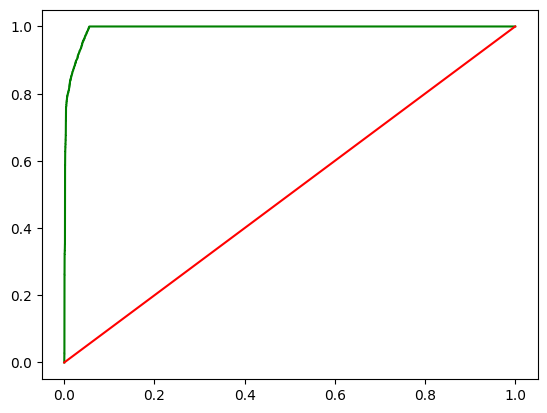

**/\**


In [ ]:
model_cal(final_model,X_train,y_train,X_test,y_test)

In [ ]:
summary_df

,Model,Accuracy,Recall,Precision,f1_score
0,LogisticRegression(),0.689231,0.593928,0.787067,0.676992
1,DecisionTreeClassifier(),0.918818,0.924686,0.927074,0.925878
2,GaussianNB(),0.691253,0.535233,0.844841,0.655308
3,AdaBoostClassifier(),0.711528,0.578067,0.847327,0.687265
4,BaggingClassifier(),0.960420,0.964439,0.963417,0.963928
5,GradientBoostingClassifier(),0.887436,0.907259,0.889643,0.898364
6,ExtraTreesClassifier(),0.853562,0.830176,0.895153,0.861441
7,HistGradientBoostingClassifier(),0.974380,0.999343,0.955934,0.977157
8,RandomForestClassifier(),0.887796,0.886801,0.906537,0.896561
9,"XGBRFClassifier(base_score=None, booster=None,...",0.713799,0.586301,0.844145,0.691984


In [ ]:
final_pred=final_model.predict(X_test)

In [ ]:
confusion_matrix(y_test,final_pred)

array([[15400,   907],
       [    6, 19791]])

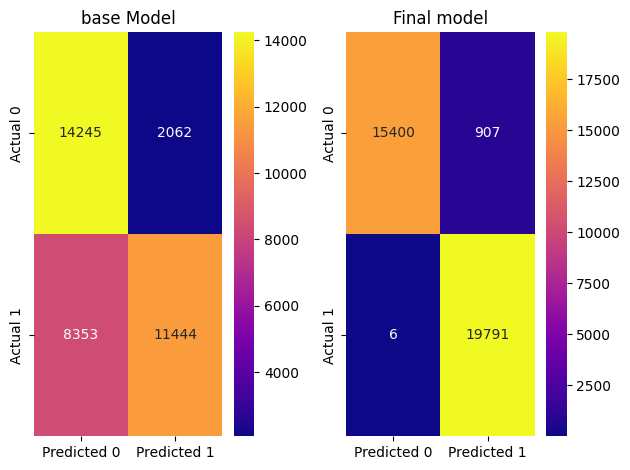

In [ ]:
plt.subplot(1,2,1)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,pred),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1']),
            annot=True,cmap='plasma',fmt='.0f');

plt.title('base Model')

plt.subplot(1,2,2)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,final_pred),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1']),
            annot=True,cmap='plasma',fmt='.0f');
plt.title('Final model')
plt.tight_layout()
plt.show()

<Axes: >

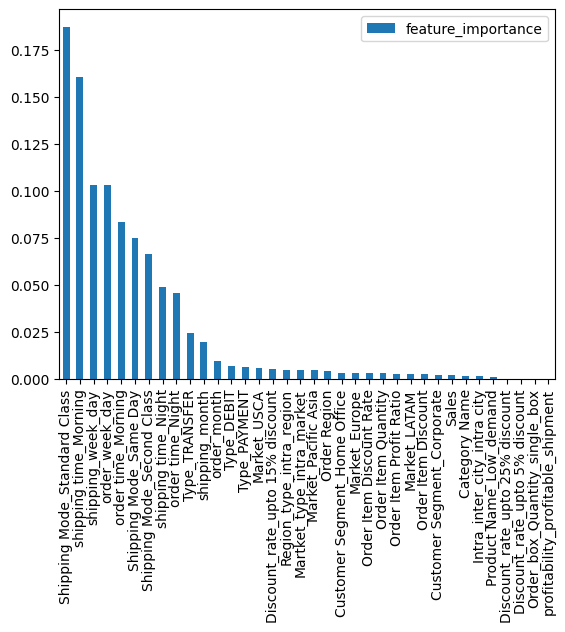

In [ ]:
pd.DataFrame((final_model.feature_importances_),index=X_train.columns, columns=['feature_importance']).sort_values(by='feature_importance',ascending=False).plot(kind='bar')

In [ ]:
summary_df.iloc[-1,]

Model        XGBClassifier(base_score=None, booster=None, c...
Accuracy                                              0.974712
Recall                                                0.999697
Precision                                             0.956179
f1_score                                              0.977454
Name: 11, dtype: object

<Axes: >

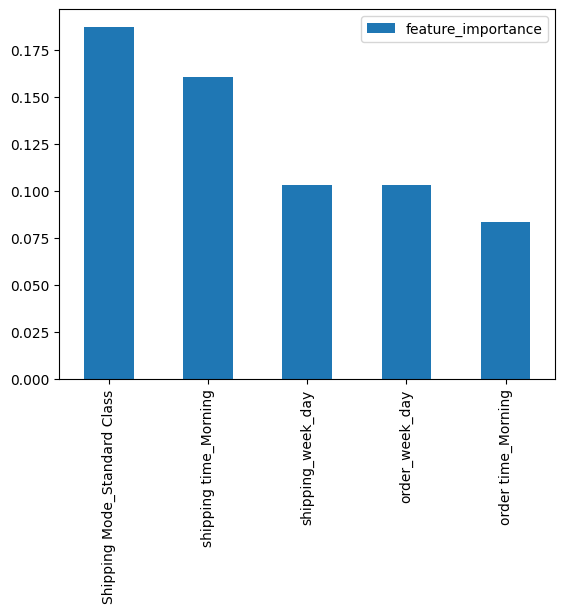

In [ ]:
pd.DataFrame((final_model.feature_importances_),index=X_train.columns, columns=['feature_importance']).sort_values(by='feature_importance',ascending=False).iloc[:5,].plot(kind='bar')

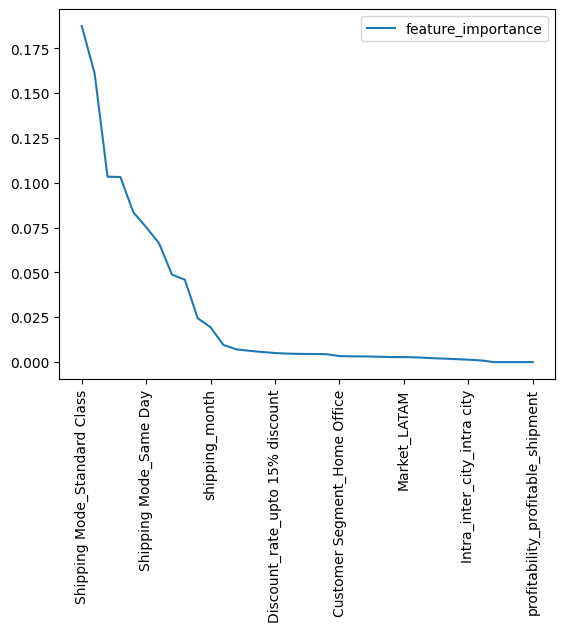

In [ ]:
pd.DataFrame((final_model.feature_importances_),index=X_train.columns, columns=['feature_importance']).sort_values(by='feature_importance',ascending=False).plot(kind='line')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# import pickle

#  Save the model to a pickle file
# with open('model.pkl', 'wb') as f:
#     pickle.dump(final_model, f)

#  Load the model from the pickle file
# with open('model.pkl', 'rb') as f:
#     loaded_model = pickle.load(f)

#  Use the loaded model to make predictions
# predictions = loaded_model.predict(X_test)